In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,IsolationForest
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,accuracy_score, f1_score
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NAFLD/nafld_clean.csv")

In [13]:
df.head(10)

,id,age,male,weight,height,bmi,case.id,futime,status
0,15612,36,0,125.3,183.0,37.568220,15612.0,2526,0
1,15592,64,1,85.2,177.0,27.189447,6352.0,1361,0
2,17549,51,0,83.2,163.0,31.459612,12806.0,4358,0
3,7205,42,1,139.0,173.0,46.442052,7205.0,1522,1
4,11913,52,1,79.5,175.0,25.804501,16686.0,324,1
5,3315,40,1,91.5,183.0,27.288649,13216.0,1004,1
6,4960,85,1,81.8,163.0,30.780592,4960.0,973,1
7,16118,26,0,93.1,173.0,31.105650,3293.0,1548,0
8,16928,69,1,99.7,181.0,30.298954,1508.0,3960,0
9,2946,72,1,101.4,152.0,43.642764,2946.0,3010,1


In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.iloc[:, :-1].values)
y = df.iloc[:, -1].values

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y)

In [6]:
models = dict()
models['XGB']= XGBClassifier(n_estimators=5000)
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['Decision Tree'] = DecisionTreeClassifier(max_depth=100)
models['Random Forest'] = RandomForestClassifier()
models['kNN'] = KNeighborsClassifier()
models['SGD']=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None)
for model in models:
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

XGB model fitting completed.
Support Vector Machine model fitting completed.
Decision Tree model fitting completed.
Random Forest model fitting completed.
kNN model fitting completed.
SGD model fitting completed.


Test Set Prediction:

--------------------XGB--------------------
              precision    recall  f1-score   support

           0    0.90643   0.98726   0.94512       157
           1    0.97727   0.84314   0.90526       102

    accuracy                        0.93050       259
   macro avg    0.94185   0.91520   0.92519       259
weighted avg    0.93433   0.93050   0.92942       259



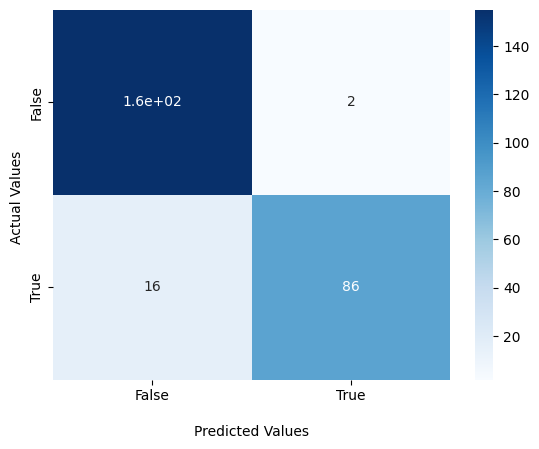

--------------------Support Vector Machine--------------------
              precision    recall  f1-score   support

           0    0.60870   0.62420   0.61635       157
           1    0.39796   0.38235   0.39000       102

    accuracy                        0.52896       259
   macro avg    0.50333   0.50328   0.50318       259
weighted avg    0.52570   0.52896   0.52721       259



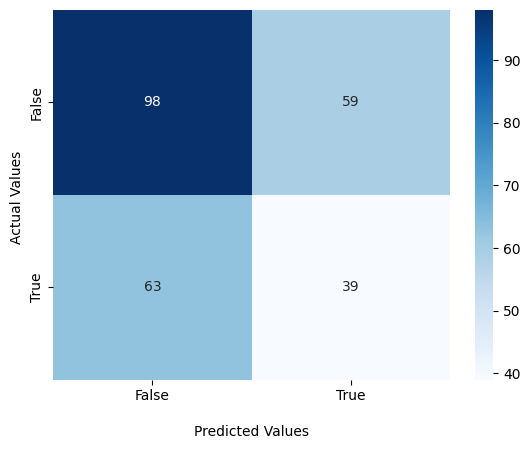

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0    0.91411   0.94904   0.93125       157
           1    0.91667   0.86275   0.88889       102

    accuracy                        0.91506       259
   macro avg    0.91539   0.90589   0.91007       259
weighted avg    0.91512   0.91506   0.91457       259



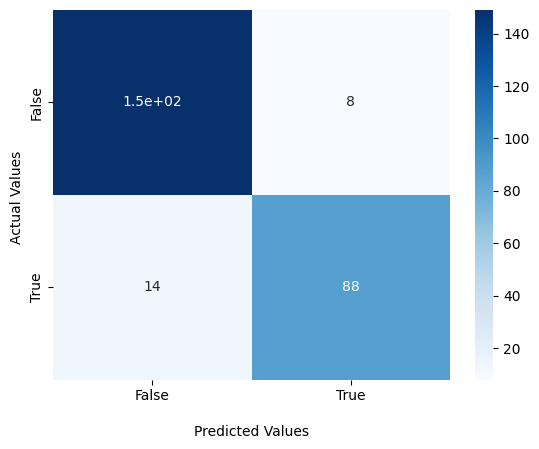

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0    0.90751   1.00000   0.95152       157
           1    1.00000   0.84314   0.91489       102

    accuracy                        0.93822       259
   macro avg    0.95376   0.92157   0.93320       259
weighted avg    0.94394   0.93822   0.93709       259



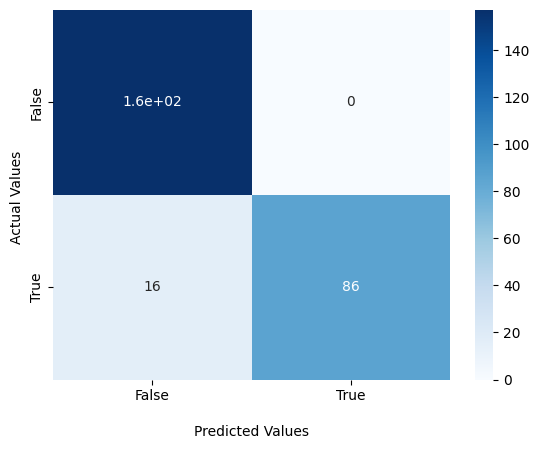

--------------------kNN--------------------
              precision    recall  f1-score   support

           0    0.86667   0.99363   0.92582       157
           1    0.98734   0.76471   0.86188       102

    accuracy                        0.90347       259
   macro avg    0.92700   0.87917   0.89385       259
weighted avg    0.91419   0.90347   0.90064       259



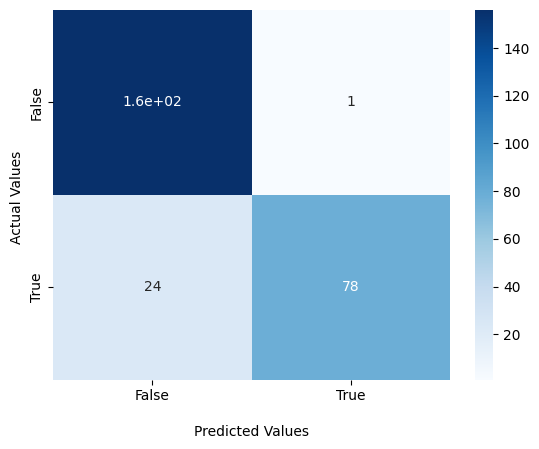

--------------------SGD--------------------
              precision    recall  f1-score   support

           0    0.87222   1.00000   0.93175       157
           1    1.00000   0.77451   0.87293       102

    accuracy                        0.91120       259
   macro avg    0.93611   0.88725   0.90234       259
weighted avg    0.92254   0.91120   0.90859       259



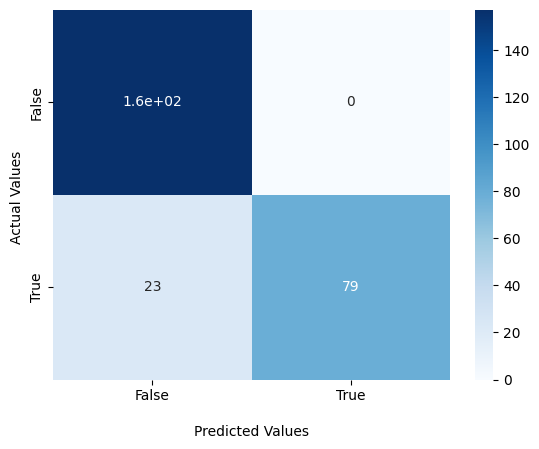

In [7]:
print("Test Set Prediction:\n")
for x in models:
    print('-'*20+x+'-'*20)
    y_pred = models[x].predict(x_test)
    print(classification_report(y_test, y_pred,digits=5))
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

--------------------VotingClassifier--------------------
              precision    recall  f1-score   support

           0    0.90751   1.00000   0.95152       157
           1    1.00000   0.84314   0.91489       102

    accuracy                        0.93822       259
   macro avg    0.95376   0.92157   0.93320       259
weighted avg    0.94394   0.93822   0.93709       259



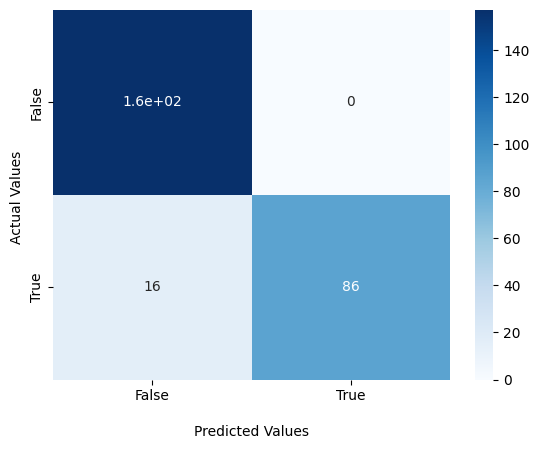

In [8]:
LogisticRegression(class_weight='balanced')
logistic_regression = LogisticRegression(max_iter=5000);
RF=RandomForestClassifier()
XGB= XGBClassifier(n_estimators=1000)
model = VotingClassifier (estimators=[('lr',logistic_regression), ('RF',RF),('XGB',XGB)], voting='soft')
model.fit(x_train, y_train);
y_pred = model.predict(x_test);
x='VotingClassifier'
print('-'*20+x+'-'*20)
print(classification_report(y_test, y_pred,digits=5))
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [9]:
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(x_train,y_train)

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

--------------------MultinomialNB--------------------
              precision    recall  f1-score   support

           0    0.65145   1.00000   0.78894       157
           1    1.00000   0.17647   0.30000       102

    accuracy                        0.67568       259
   macro avg    0.82573   0.58824   0.54447       259
weighted avg    0.78872   0.67568   0.59639       259



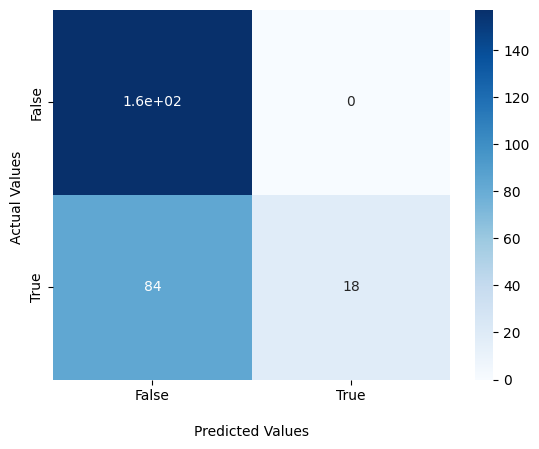

In [10]:
print('-'*20+"MultinomialNB"+'-'*20)
y_pred = p.predict(x_test)
print(classification_report(y_test, y_pred,digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [11]:
Mnp = Pipeline([('Normalizing',MinMaxScaler()),('ComplementNB',ComplementNB())])
Mnp.fit(x_train,y_train)

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('ComplementNB', ComplementNB())])

--------------------Complement NB--------------------
              precision    recall  f1-score   support

           0    0.86755   0.83439   0.85065       157
           1    0.75926   0.80392   0.78095       102

    accuracy                        0.82239       259
   macro avg    0.81340   0.81916   0.81580       259
weighted avg    0.82490   0.82239   0.82320       259



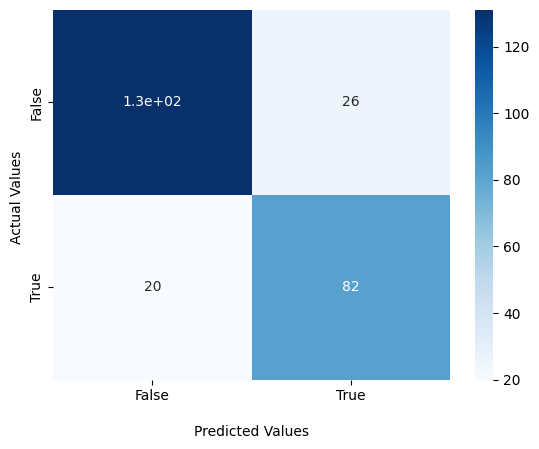

In [12]:
print('-'*20+"Complement NB"+'-'*20)
y_pred = Mnp.predict(x_test)
print(classification_report(y_test, y_pred,digits=5))
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()